In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Set plotting styles
sns.set(style="whitegrid")

In [15]:
# Load datasets
customer_journey = pd.read_csv("cleaned_data.csv")
product_data = pd.read_csv("product_data.csv")

In [16]:
# Data Integration and Cleaning
data = pd.merge(customer_journey, product_data, on="CustomerID", how="left")
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)


C:\Users\Amar\AppData\Local\Temp\ipykernel_6604\3949038259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Journey Stage", data=data, palette="Set2")


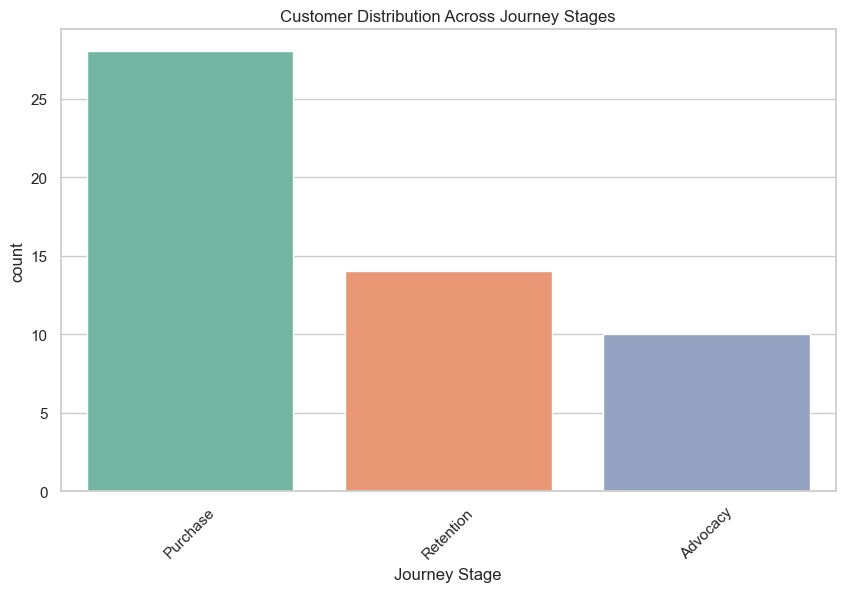

In [18]:
# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x="Journey Stage", data=data, palette="Set2")
plt.title("Customer Distribution Across Journey Stages")
plt.xticks(rotation=45)
plt.show()

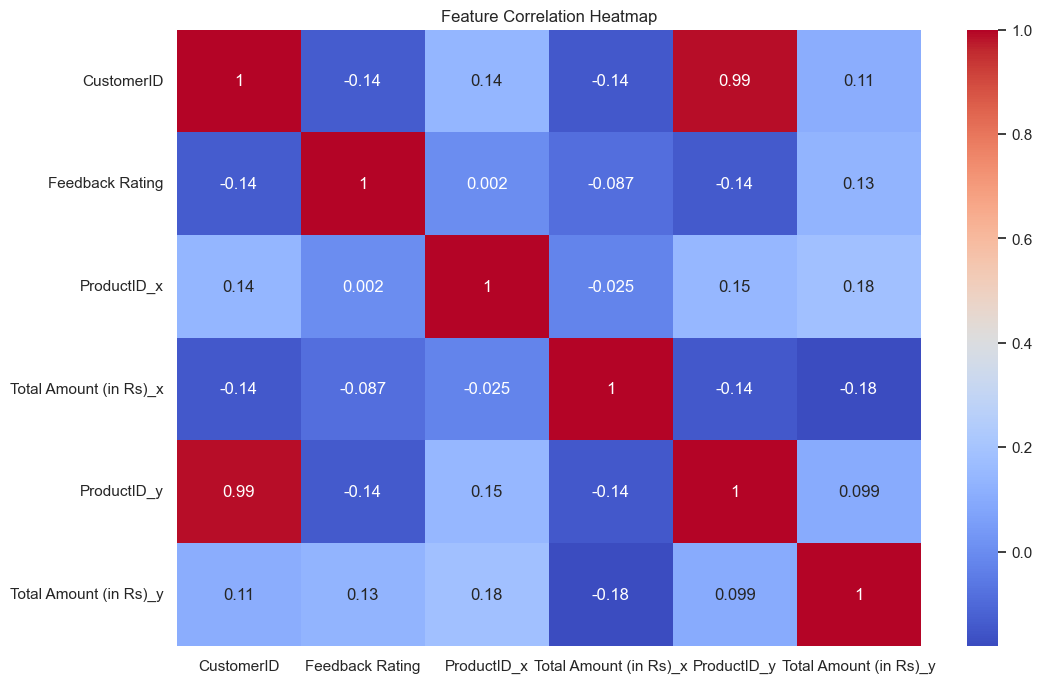

In [19]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
# Dimensionality Reduction
features = data.select_dtypes(include=[np.number])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

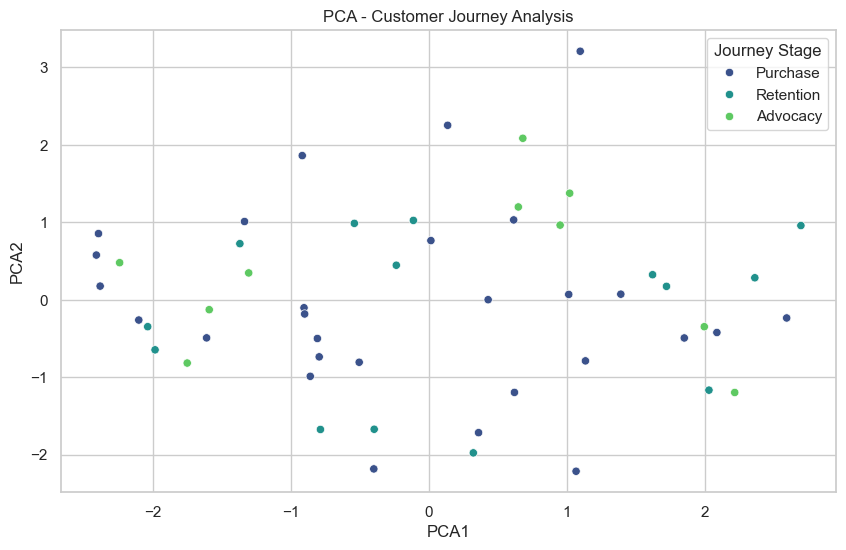

In [23]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Journey Stage", data=data, palette="viridis")
plt.title("PCA - Customer Journey Analysis")
plt.show()

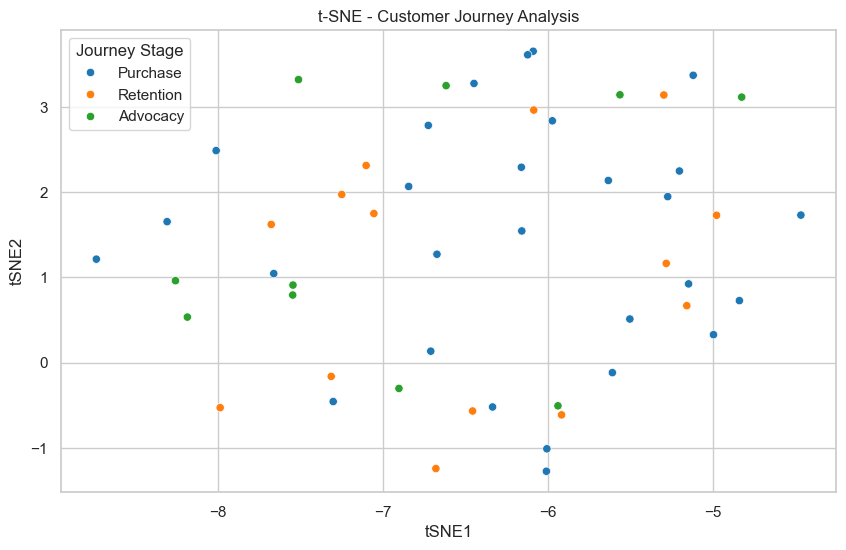

In [27]:
# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(scaled_features)
data['tSNE1'] = tsne_result[:, 0]
data['tSNE2'] = tsne_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="tSNE1", y="tSNE2", hue="Journey Stage", data=data, palette="tab10")
plt.title("t-SNE - Customer Journey Analysis")
plt.show()


In [29]:
# Predictive Modeling - Logistic Regression
X = scaled_features
y = data['Journey Stage'].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.57      0.67      0.62         6
           2       0.00      0.00      0.00         3

    accuracy                           0.36        11
   macro avg       0.19      0.22      0.21        11
weighted avg       0.31      0.36      0.34        11



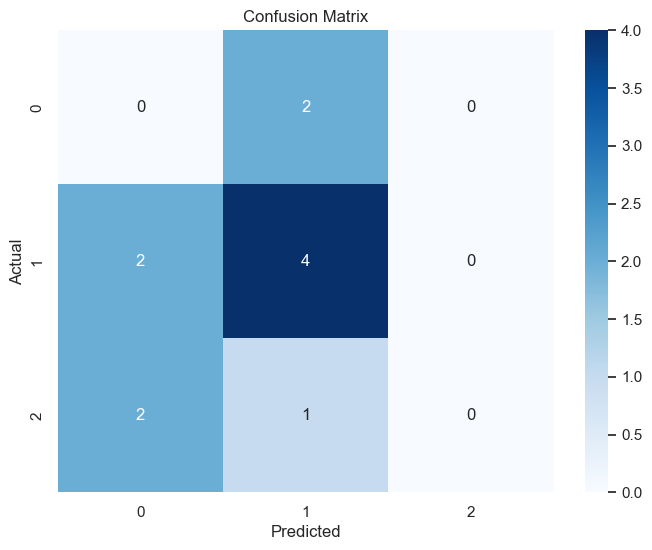

In [30]:
# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [31]:
# Insights from Dimensionality Reduction
explained_variance = pca.explained_variance_ratio_
print(f"PCA Explained Variance Ratio: {explained_variance}")
print("PCA components highlight how much variance each dimension explains, giving insights into key behavioral drivers.")

PCA Explained Variance Ratio: [0.35455562 0.2146291 ]
PCA components highlight how much variance each dimension explains, giving insights into key behavioral drivers.


In [32]:
# Save processed data
data.to_csv("processed_customer_journey_data.csv", index=False)

In [33]:
# Load and display the saved processed data
processed_data = pd.read_csv("processed_customer_journey_data.csv")
print(processed_data.head())  # Display the first few rows
print(processed_data.info())  # Get an overview of data types and non-null counts


   CustomerID Month Of Interaction New/Old Customer Referral sources  \
0           3              January     New Customer   Friends/Family   
1           6              January     New Customer    Advertisement   
2           7              January     New Customer   Friends/Family   
3          11              January     New Customer    Advertisement   
4          13              January     Old Customer   Friends/Family   

  Clothing Section_x Journey Stage   Touchpoints        Actions  \
0                Men      Purchase  Social Media  Added to Cart   
1              Women      Purchase       Website  Made Purchase   
2                Men      Purchase    E-Commerce  Made Purchase   
3                Men     Retention  Social Media  Posted Review   
4                Men      Purchase       Website  Made Purchase   

        Outcomes   Sales Campaign_x  ...  Product Name_y Product Category_y  \
0      Purchased  Winter Collection  ...          Tshirt            Topwear   
1     